In [7]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#To enable matplot visualization
%matplotlib inline


In [9]:

printer = pd.read_excel('Expt 2 Datasheet.xlsx')


In [10]:
printer.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [11]:
printer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strenght    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [12]:
printer['infill_pattern'].replace(['grid','honeycomb'], [0,1], inplace = True)
printer['material'].replace(['abs','pla'], [0,1], inplace = True)

In [13]:
printer.head(10)

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6,90,0,250,80,40,0,100,92,5,0.7
5,0.02,10,40,1,200,60,40,1,0,60,24,1.1
6,0.02,5,10,0,205,65,40,1,25,55,12,1.3
7,0.02,10,10,1,210,70,40,1,50,21,14,1.5
8,0.02,9,70,0,215,75,40,1,75,24,27,1.4
9,0.02,8,40,1,220,80,40,1,100,30,25,1.7


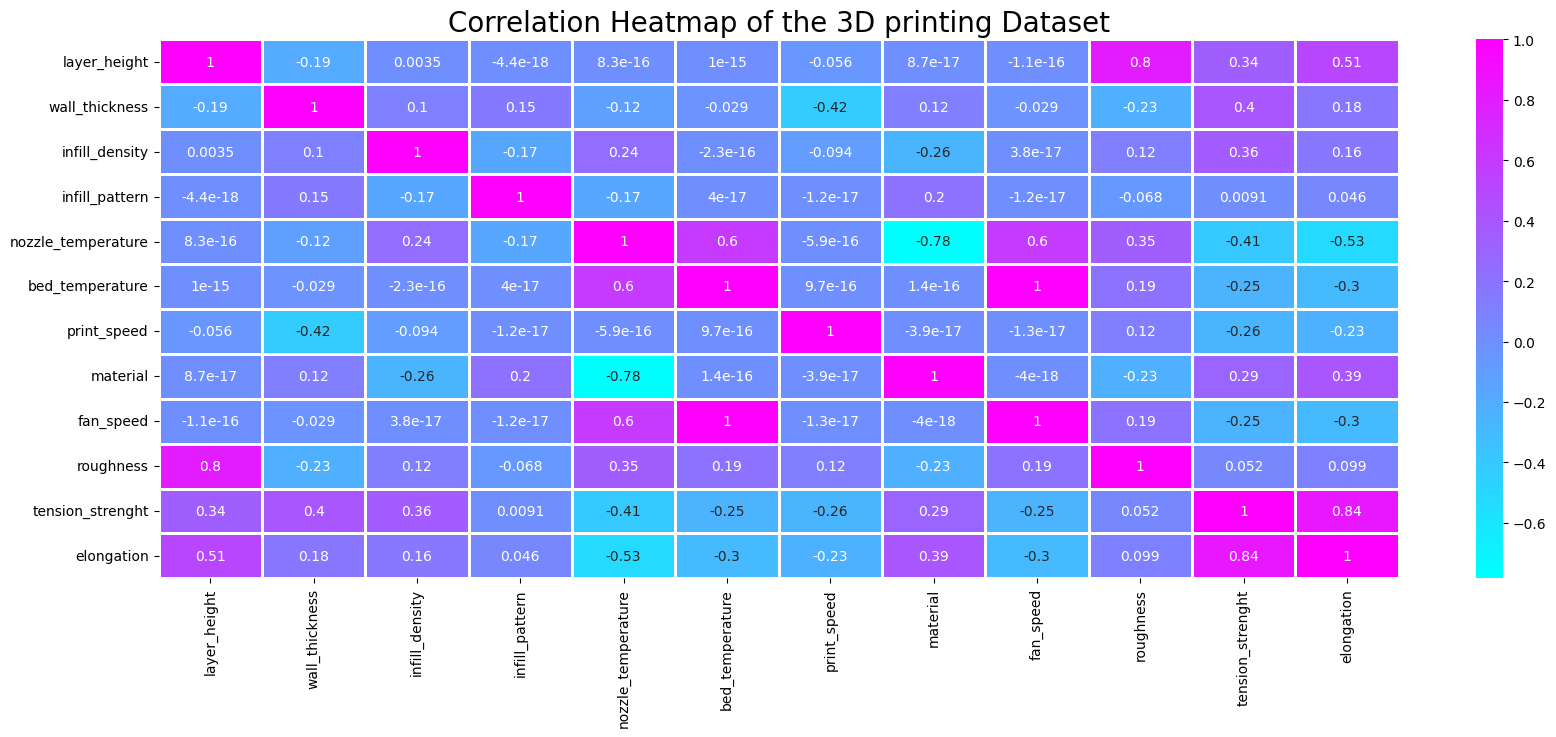

In [14]:
# Creating the heatmap
# First create a space for the heatmap and then draw the heatmap inside the space
fig, ax = plt.subplots(figsize = (20,7))
#Title for the heatmap
title = 'Correlation Heatmap of the 3D printing Dataset'
plt.title(title, fontsize = 20)
ttl = ax.title
# Correlation heatmap using .heatmap() function of sns library
sns.heatmap(printer.corr(), cbar = True, cmap = 'cool', annot = True, linewidths = 1, ax = ax)
#enable visualization using .show() function of matplot
plt.show()


#Model 1 : Predicting roughness based on 9 features.


In [15]:
#Model 1 : Predicting roughness based on 9 features.
# Defining features and labels
X = printer.drop(['roughness','tension_strenght','elongation'], axis = 1)
y = printer['roughness']

X.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,0.02,8,90,0,220,60,40,0,0
1,0.02,7,90,1,225,65,40,0,25
2,0.02,1,80,0,230,70,40,0,50
3,0.02,4,70,1,240,75,40,0,75
4,0.02,6,90,0,250,80,40,0,100


In [16]:
#importing statsmodels library
import statsmodels.api as sm


In [17]:
# let's define a function for the multiple regression
def linear_Regression(x,y):
  x = sm.add_constant(X)
#defining the model, fitting the model and printing the results
  multiple_model = sm.OLS(y,x).fit()
  print(multiple_model.summary())


In [18]:
#calling the linear regression function
linear_Regression(X,y)


                            OLS Regression Results                            
Dep. Variable:              roughness   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     35.95
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           3.83e-16
Time:                        12:08:48   Log-Likelihood:                -248.19
No. Observations:                  50   AIC:                             514.4
Df Residuals:                      41   BIC:                             531.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.9534      0

In [19]:
X.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,0.02,8,90,0,220,60,40,0,0
1,0.02,7,90,1,225,65,40,0,25
2,0.02,1,80,0,230,70,40,0,50
3,0.02,4,70,1,240,75,40,0,75
4,0.02,6,90,0,250,80,40,0,100


In [20]:
X = X.drop(['wall_thickness','infill_density','infill_pattern'], axis = 1)
X.head()

,layer_height,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,0.02,220,60,40,0,0
1,0.02,225,65,40,0,25
2,0.02,230,70,40,0,50
3,0.02,240,75,40,0,75
4,0.02,250,80,40,0,100


In [21]:
#calling the linear regression function
linear_Regression(X,y)

                            OLS Regression Results                            
Dep. Variable:              roughness   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     59.78
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.67e-18
Time:                        12:08:48   Log-Likelihood:                -248.88
No. Observations:                  50   AIC:                             509.8
Df Residuals:                      44   BIC:                             521.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.9307      0

In [22]:
X.head()

,layer_height,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,0.02,220,60,40,0,0
1,0.02,225,65,40,0,25
2,0.02,230,70,40,0,50
3,0.02,240,75,40,0,75
4,0.02,250,80,40,0,100


In [24]:
#get the interaction terms by multiplying values
inter_mn = X['material']*X['nozzle_temperature']
inter_bn = X['bed_temperature']*X['nozzle_temperature']
inter_fn = X['fan_speed']*X['nozzle_temperature']
inter_fb = X['fan_speed']*X['bed_temperature']
#adding these interaction terms to dataset using .concat() function of pandas
#we will call this dataset as interaction
interaction = pd.concat([X,inter_mn,inter_bn,inter_fn,inter_fb], axis = 1)
#chenge column names of this interaction terms
interaction = interaction.rename(columns = {0:'interct_mn', 1:'interact_bn', 2:'interact_fn',
3:'interact_fb'})

In [25]:
interaction.head(10)


,layer_height,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,interct_mn,interact_bn,interact_fn,interact_fb
0,0.02,220,60,40,0,0,0,13200,0,0
1,0.02,225,65,40,0,25,0,14625,5625,1625
2,0.02,230,70,40,0,50,0,16100,11500,3500
3,0.02,240,75,40,0,75,0,18000,18000,5625
4,0.02,250,80,40,0,100,0,20000,25000,8000
5,0.02,200,60,40,1,0,200,12000,0,0
6,0.02,205,65,40,1,25,205,13325,5125,1625
7,0.02,210,70,40,1,50,210,14700,10500,3500
8,0.02,215,75,40,1,75,215,16125,16125,5625
9,0.02,220,80,40,1,100,220,17600,22000,8000


In [26]:
# NOw let's fit this model to the linear regression function
linear_Regression(interaction,y)

                            OLS Regression Results                            
Dep. Variable:              roughness   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     59.78
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.67e-18
Time:                        12:11:33   Log-Likelihood:                -248.88
No. Observations:                  50   AIC:                             509.8
Df Residuals:                      44   BIC:                             521.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.9307      0

#Model 2: Predicting Tension strength based on features

In [27]:
X = printer.drop(['roughness','tension_strenght','elongation'], axis = 1)
X.head()


,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,0.02,8,90,0,220,60,40,0,0
1,0.02,7,90,1,225,65,40,0,25
2,0.02,1,80,0,230,70,40,0,50
3,0.02,4,70,1,240,75,40,0,75
4,0.02,6,90,0,250,80,40,0,100


In [32]:
y = printer['tension_strenght']
y

0     18
1     16
2      8
3     10
4      5
5     24
6     12
7     14
8     27
9     25
10    37
11    12
12    16
13     9
14    10
15    27
16    23
17    26
18    33
19    29
20    16
21    12
22    10
23    19
24     8
25    11
26    12
27    18
28    34
29    14
30    27
31    19
32    18
33     9
34    13
35    33
36    24
37    26
38    22
39     4
40    35
41    34
42    28
43    28
44    21
45    28
46    14
47    30
48    29
49    27
Name: tension_strenght, dtype: int64

In [33]:
linear_Regression(X,y)


                            OLS Regression Results                            
Dep. Variable:       tension_strenght   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     15.27
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.07e-08
Time:                        12:14:40   Log-Likelihood:                -154.73
No. Observations:                  50   AIC:                             321.5
Df Residuals:                      44   BIC:                             332.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0191      0

In [29]:
X = X.drop(['infill_pattern','print_speed','material'], axis = 1)
X.head()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,fan_speed
0,0.02,8,90,220,60,0
1,0.02,7,90,225,65,25
2,0.02,1,80,230,70,50
3,0.02,4,70,240,75,75
4,0.02,6,90,250,80,100


In [34]:
linear_Regression(X,y)


                            OLS Regression Results                            
Dep. Variable:       tension_strenght   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     15.27
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.07e-08
Time:                        12:15:16   Log-Likelihood:                -154.73
No. Observations:                  50   AIC:                             321.5
Df Residuals:                      44   BIC:                             332.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0191      0

In [35]:
interaction = pd.concat([X,inter_mn,inter_bn,inter_fn,inter_fb], axis = 1)
interaction = interaction.rename(columns = {0:'interct_mn', 1:'interact_bn', 2:'interact_fn',
3:'interact_fb'})
interaction.head()


,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,fan_speed,interct_mn,interact_bn,interact_fn,interact_fb
0,0.02,8,90,220,60,0,0,13200,0,0
1,0.02,7,90,225,65,25,0,14625,5625,1625
2,0.02,1,80,230,70,50,0,16100,11500,3500
3,0.02,4,70,240,75,75,0,18000,18000,5625
4,0.02,6,90,250,80,100,0,20000,25000,8000


In [36]:
linear_Regression(interaction,y)

                            OLS Regression Results                            
Dep. Variable:       tension_strenght   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     15.27
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.07e-08
Time:                        12:15:40   Log-Likelihood:                -154.73
No. Observations:                  50   AIC:                             321.5
Df Residuals:                      44   BIC:                             332.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0191      0

#Model 3 : Predicitng Elongation based on the features


In [37]:
printer.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6,90,0,250,80,40,0,100,92,5,0.7


In [39]:
X = printer.drop(['roughness','tension_strenght','elongation'], axis = 1)
X.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,0.02,8,90,0,220,60,40,0,0
1,0.02,7,90,1,225,65,40,0,25
2,0.02,1,80,0,230,70,40,0,50
3,0.02,4,70,1,240,75,40,0,75
4,0.02,6,90,0,250,80,40,0,100


In [40]:
linear_Regression(X,y)

                            OLS Regression Results                            
Dep. Variable:       tension_strenght   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     10.55
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           6.91e-08
Time:                        12:16:55   Log-Likelihood:                -151.94
No. Observations:                  50   AIC:                             321.9
Df Residuals:                      41   BIC:                             339.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0663      0

In [41]:
X = X.drop(['infill_pattern','print_speed'], axis = 1)
X.head()

,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,material,fan_speed
0,0.02,8,90,220,60,0,0
1,0.02,7,90,225,65,0,25
2,0.02,1,80,230,70,0,50
3,0.02,4,70,240,75,0,75
4,0.02,6,90,250,80,0,100


In [42]:
linear_Regression(X,y)


                            OLS Regression Results                            
Dep. Variable:       tension_strenght   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     14.33
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           6.78e-09
Time:                        12:17:12   Log-Likelihood:                -152.42
No. Observations:                  50   AIC:                             318.8
Df Residuals:                      43   BIC:                             332.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0646      0

In [43]:
interaction = pd.concat([X,inter_mn,inter_bn,inter_fn,inter_fb], axis = 1)
interaction = interaction.rename(columns = {0:'interct_mn', 1:'interact_bn', 2:'interact_fn',
3:'interact_fb'})
interaction.head()


,layer_height,wall_thickness,infill_density,nozzle_temperature,bed_temperature,material,fan_speed,interct_mn,interact_bn,interact_fn,interact_fb
0,0.02,8,90,220,60,0,0,0,13200,0,0
1,0.02,7,90,225,65,0,25,0,14625,5625,1625
2,0.02,1,80,230,70,0,50,0,16100,11500,3500
3,0.02,4,70,240,75,0,75,0,18000,18000,5625
4,0.02,6,90,250,80,0,100,0,20000,25000,8000


In [44]:
linear_Regression(interaction,y)


                            OLS Regression Results                            
Dep. Variable:       tension_strenght   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     14.33
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           6.78e-09
Time:                        12:17:44   Log-Likelihood:                -152.42
No. Observations:                  50   AIC:                             318.8
Df Residuals:                      43   BIC:                             332.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0646      0